In [1]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data

data = pd.read_csv("C:/Users/E7440/Projects_22/Machine-learning\Data/survey_results_public.csv")

In [3]:
# view first 5 rows

data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
data = data[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
data = data.rename({"ConvertedComp": "Salary"}, axis=1)
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [5]:
data = data[data['Salary'].notnull()]
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [7]:
data.isnull().sum()

Country           0
EdLevel         568
YearsCodePro    135
Employment       39
Salary            0
dtype: int64

In [8]:
data = data.dropna()


In [9]:
data.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
data = data[data["Employment"] == "Employed full-time"]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30019 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Employment    30019 non-null  object 
 4   Salary        30019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [11]:
data=data.drop("Employment", axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [12]:
data["Country"].value_counts()

Country
United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [13]:
# clean the countries data create a function

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [14]:
country_map = shorten_categories(data.Country.value_counts(), 400)
data['Country'] = data['Country'].map(country_map)
data.Country.value_counts()

Country
Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: count, dtype: int64

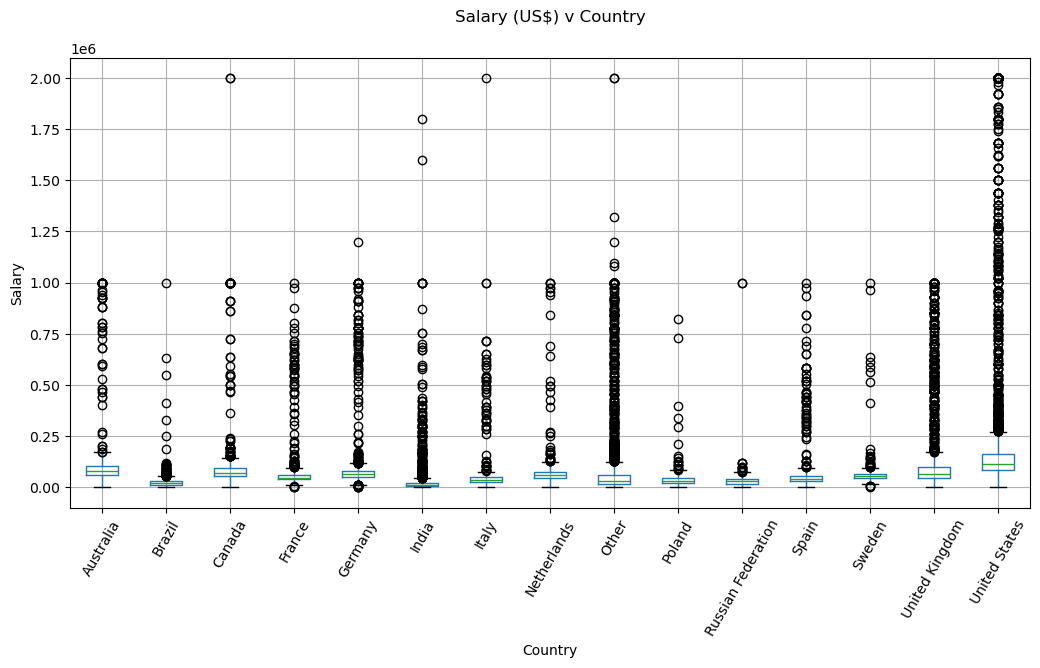

In [15]:
#plot the salary col
fig, ax = plt.subplots(1,1, figsize=(12, 6))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=60)
plt.show()

In [16]:
# set the range on salary column
data = data[data["Salary"] <= 250000]
data = data[data["Salary"] >= 10000]
data = data[data['Country'] != 'Other']

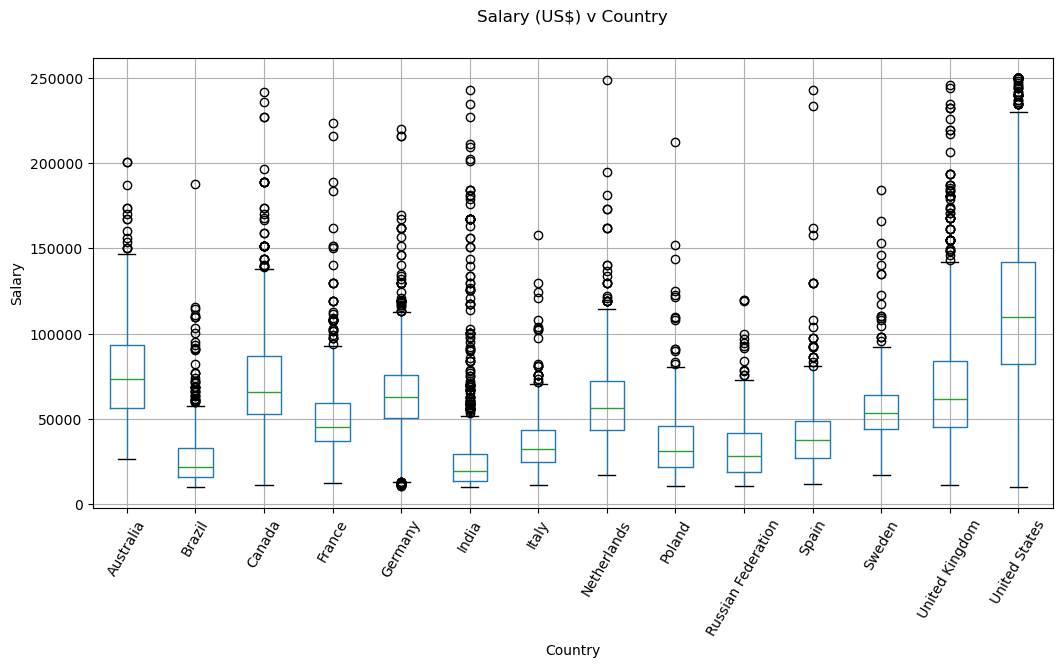

In [17]:
# again plot this new salary column

fig, ax = plt.subplots(1,1, figsize=(12, 6))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=60)
plt.show()

In [18]:
# clean the Years code pro column
data["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [19]:
#convert the string into int and float 

def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

data['YearsCodePro'] = data['YearsCodePro'].apply(clean_experience)

In [20]:
data["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [21]:
# clean the education level 

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

data['EdLevel'] = data['EdLevel'].apply(clean_education)

In [22]:
data["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [23]:
# transform categorical variable into numerical value

from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
data['EdLevel'] = le_education.fit_transform(data['EdLevel'])
data["EdLevel"].unique()

array([0, 2, 1, 3])

In [24]:
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
data["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [25]:
# create a feature and target variable

X = data.drop("Salary", axis=1)
y = data["Salary"]

In [26]:
from sklearn.linear_model import LinearRegression

#create linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [27]:
#predict the model

y_pred = linear_reg.predict(X)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#getting mean squared error
error = np.sqrt(mean_squared_error(y, y_pred))

In [29]:
print(error)

39274.75368318509


In [30]:
from sklearn.ensemble import RandomForestRegressor

# create  Random fores classifier
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [31]:
#predict the model

y_pred = random_forest_reg.predict(X)

In [32]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,487.31


In [33]:
from sklearn.tree import DecisionTreeRegressor

# create Decision tree regressor model
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred = dec_tree_reg.predict(X)

In [37]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,414.94


In [38]:
from sklearn.model_selection import GridSearchCV

#tuning hyperparameter

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [39]:

#set the model

regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,428.51


In [40]:
print(X)

       Country  EdLevel  YearsCodePro
7           13        0          13.0
9           12        2           4.0
10          12        0           2.0
11          10        1           7.0
12           7        1          20.0
...        ...      ...           ...
64113       13        1          15.0
64116       13        0           6.0
64122       13        1           4.0
64127       13        3          12.0
64129       13        2           4.0

[18491 rows x 3 columns]


In [41]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [42]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [43]:
y_pred = regressor.predict(X)
y_pred

c:\Users\E7440\anaconda3\envs\myenvs\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])

#### Saving the model

In [46]:
import pickle

df = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(df, file)

In [47]:
with open('saved_steps.pkl', 'rb') as file:
    df = pickle.load(file)

regressor_loaded = df["model"]
le_country = df["le_country"]
le_education = df["le_education"]

In [48]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\E7440\anaconda3\envs\myenvs\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])